# **PROJECT TITLE : BOOSTING USER ENGAGEMENT VIA GENRE INSIGHTS**

![Movies Lens](Movies_Lens.png)

# **PROJECT OVERVIEW** 
This project focuses on the analysis and modeling of user preferences and movie ratings using the MovieLens dataset. The dataset is composed of three separate files: movies.csv, ratings.csv, and users.csv, each providing critical information about movies, user interactions, and demographic attributes. The data was first cleaned to handle missing values, standardize formats, and ensure consistency across datasets. Following this, the datasets were merged into a single comprehensive DataFrame, df_Merged, to enable an integrated analysis of user behavior and movie features.


# **PROBLEM STATEMENT**
Streaming platforms and movie services struggle to retain users due to irrelevant recommendations and underutilized content categories. By analyzing movie metadata such as genres, titles, and missing poster URLs, we aim to improve content organization, recommendability, and engagement on the platform.

# **OBJECTIVES**
1. To analyze and visualize the distribution of user ages in the dataset to identify the most represented age groups.
2. To examine the gender breakdown of users in order to understand the demographic composition of the audience.
3. To investigate how users rate content, including the distribution of rating scores and the identification of trends or biases.
4. To compare rating distributions across user occupations.


In [1]:
# importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. DATA LOADING & EXPLORATION**

#### **1.movies.csv**

In [2]:
# Loading the dataframe
df_Movies =pd.read_csv("Data/movies.csv")
df_Movies

,movie_id,movie_title,movie_genres,poster_url
0,3107,Backdraft (1991),"0, 7",https://image.tmdb.org/t/p/w500/bymJtYNIdiAiBR...
1,2114,"Outsiders, The (1983)",7,https://image.tmdb.org/t/p/w500/pl8Tf36TAOb2i5...
2,256,Junior (1994),"4, 15",https://image.tmdb.org/t/p/w500/4tRF43CbEYHmV8...
3,1389,Jaws 3-D (1983),"0, 10",https://image.tmdb.org/t/p/w500/kqDXj53F9paqVG...
4,3635,"Spy Who Loved Me, The (1977)",0,https://image.tmdb.org/t/p/w500/3ZxHKFxMYvAko6...
...,...,...,...,...
3701,311,Relative Fear (1994),"10, 16",https://image.tmdb.org/t/p/w500/wG6wdsB9lqCwxs...
3702,2563,Beauty (1998),7,NaN
3703,763,"Last of the High Kings, The (a.k.a. Summer Fli...",7,https://image.tmdb.org/t/p/w500/pSdzsYKg1wpmYp...
3704,1724,Full Speed (1996),7,https://image.tmdb.org/t/p/w500/hrExpoA2E2bCrS...


movies.csv: Contains movie metadata including titles, genres, and poster URLs.

In [3]:
# Get an overview of the df_Movies DataFrame
df_Movies.info()

# Displaying the first 5 rows of the Ratings dataset
df_Movies.shape
print("The number of rows and columns in the Movies dataset are: ", df_Movies.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      3706 non-null   int64 
 1   movie_title   3706 non-null   object
 2   movie_genres  3706 non-null   object
 3   poster_url    3648 non-null   object
dtypes: int64(1), object(3)
memory usage: 115.9+ KB
The number of rows and columns in the Movies dataset are:  (3706, 4)


In [4]:
# Statistics of the Movies dataset
df_Movies.describe(include='all')

,movie_id,movie_title,movie_genres,poster_url
count,3706.000000,3706,3706,3648
unique,NaN,3706,301,3574
top,NaN,Just Cause (1995),7,https://image.tmdb.org/t/p/w500/yL1rYMHlqZtZVE...
freq,NaN,1,759,5
mean,1995.573125,NaN,NaN,NaN
std,1151.148045,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,989.250000,NaN,NaN,NaN
50%,2033.500000,NaN,NaN,NaN
75%,2990.750000,NaN,NaN,NaN


In [5]:
# Check for missing values in the Movies dataset
df_Movies.isnull().sum()

movie_id         0
movie_title      0
movie_genres     0
poster_url      58
dtype: int64

There are missing 58 values in poster_url.

In [6]:
# Check for duplicates in the Movies dataset
df_Movies.duplicated().sum()


0

There are no fully duplicated rows in df_Movies.

#### **2. ratings.csv**

In [7]:
# Loading the dataset
df_Ratings = pd.read_csv("Data/ratings.csv")
df_Ratings

,user_id,movie_id,user_rating,timestamp
0,130,3107,5.0,977432193
1,3829,2114,4.0,965932967
2,1265,256,1.0,1012103552
3,2896,1389,5.0,972004605
4,5264,3635,4.0,961180111
...,...,...,...,...
1000204,4508,2290,4.0,964985140
1000205,4167,2643,1.0,965335130
1000206,5799,593,5.0,958054732
1000207,3224,1693,3.0,968543692


ratings.csv: Contains movie ratings by users along with a timestamp that is in Unix time format.

In [8]:
# Get an overview of the df_Ratings DataFrame
df_Ratings.info()

# Displaying the shape of the Ratings dataset
df_Ratings.shape
print("The number of rows and columns in the Movies dataset are: ", df_Ratings.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   user_id      1000209 non-null  int64  
 1   movie_id     1000209 non-null  int64  
 2   user_rating  1000209 non-null  float64
 3   timestamp    1000209 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 30.5 MB
The number of rows and columns in the Movies dataset are:  (1000209, 4)


In [9]:
# Statistics of the Ratings dataset
df_Ratings.describe(include='all')

,user_id,movie_id,user_rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [10]:
# Checking for missing values in the Ratings dataFrame.
df_Ratings.isnull().sum()

user_id        0
movie_id       0
user_rating    0
timestamp      0
dtype: int64

There are no missing values in df_Ratings

In [11]:
# Checking for duplicates in the Ratings dataset
df_Ratings.duplicated().sum()

0

There are no fully duplicated rows in df_Ratings.

#### **3. users.csv**

In [12]:
# Loading the dataset
df_Users = pd.read_csv("Data/users.csv")
df_Users

,user_id,user_gender,bucketized_user_age,user_occupation_label,user_occupation_text,user_zip_code
0,130,True,35.0,18,technician/engineer,50021
1,3829,False,25.0,0,academic/educator,22307
2,1265,False,18.0,21,writer,49321
3,2896,True,18.0,14,sales/marketing,60073
4,5264,True,18.0,17,college/grad student,15217
...,...,...,...,...,...,...
6035,4264,True,45.0,0,academic/educator,60102
6036,2657,False,1.0,17,K-12 student,47403
6037,2626,True,56.0,0,academic/educator,04056
6038,318,False,56.0,13,retired,55104


users.csv: Contains user information such as age, occupation, and gender.

In [13]:
# Get an overview of the df_Users DataFrame
df_Users.info()

# Displaying the shape of the Users dataset
df_Users.shape
print("The number of rows and columns in the Movies dataset are: ", df_Users.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                6040 non-null   int64  
 1   user_gender            6040 non-null   bool   
 2   bucketized_user_age    6040 non-null   float64
 3   user_occupation_label  6040 non-null   int64  
 4   user_occupation_text   6040 non-null   object 
 5   user_zip_code          6040 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 242.0+ KB
The number of rows and columns in the Movies dataset are:  (6040, 6)


In [14]:
# Statistics of the Users dataset
df_Users.describe(include='all')

,user_id,user_gender,bucketized_user_age,user_occupation_label,user_occupation_text,user_zip_code
count,6040.000000,6040,6040.000000,6040.000000,6040,6040
unique,NaN,2,NaN,NaN,21,3439
top,NaN,True,NaN,NaN,college/grad student,48104
freq,NaN,4331,NaN,NaN,759,19
mean,3020.500000,NaN,30.639238,11.005795,NaN,NaN
std,1743.742145,NaN,12.895962,6.450556,NaN,NaN
min,1.000000,NaN,1.000000,0.000000,NaN,NaN
25%,1510.750000,NaN,25.000000,6.000000,NaN,NaN
50%,3020.500000,NaN,25.000000,12.000000,NaN,NaN
75%,4530.250000,NaN,35.000000,17.000000,NaN,NaN


In [15]:
# Checking for missing values in the Users dataset
df_Users.isnull().sum()

user_id                  0
user_gender              0
bucketized_user_age      0
user_occupation_label    0
user_occupation_text     0
user_zip_code            0
dtype: int64

There are no missing values in df_Users.

In [16]:
# Checking for duplicates in the Ratings dataset
df_Users.duplicated().sum()

0

There are no fully duplicated rows in df_Users.

# **EXPLORATORY DATA ANALYSIS**

## **1. DATA CLEANING**

In [17]:
def get_genre_placeholder_url(genre):
    genre_group = df_Movies[(df_Movies['movie_genres'] == genre) & (df_Movies['poster_url'].notna())]
    if not genre_group.empty:
        return genre_group['poster_url'].sample(1).values[0]
    else:
        return 'https://via.placeholder.com/300x450?text=No+Image'


In [18]:
df_Movies['poster_url'] = df_Movies.apply(
    lambda row: get_genre_placeholder_url(row['movie_genres']) if pd.isna(row['poster_url']) else row['poster_url'],
    axis=1
)
df_Movies


,movie_id,movie_title,movie_genres,poster_url
0,3107,Backdraft (1991),"0, 7",https://image.tmdb.org/t/p/w500/bymJtYNIdiAiBR...
1,2114,"Outsiders, The (1983)",7,https://image.tmdb.org/t/p/w500/pl8Tf36TAOb2i5...
2,256,Junior (1994),"4, 15",https://image.tmdb.org/t/p/w500/4tRF43CbEYHmV8...
3,1389,Jaws 3-D (1983),"0, 10",https://image.tmdb.org/t/p/w500/kqDXj53F9paqVG...
4,3635,"Spy Who Loved Me, The (1977)",0,https://image.tmdb.org/t/p/w500/3ZxHKFxMYvAko6...
...,...,...,...,...
3701,311,Relative Fear (1994),"10, 16",https://image.tmdb.org/t/p/w500/wG6wdsB9lqCwxs...
3702,2563,Beauty (1998),7,https://image.tmdb.org/t/p/w500/ph5EjFfSL2doaN...
3703,763,"Last of the High Kings, The (a.k.a. Summer Fli...",7,https://image.tmdb.org/t/p/w500/pSdzsYKg1wpmYp...
3704,1724,Full Speed (1996),7,https://image.tmdb.org/t/p/w500/hrExpoA2E2bCrS...


In [19]:
# Check if missing values are filled
df_Movies['poster_url'].isna().sum()


0

## **2. MERGING THE DATAFRAMES**

In [20]:
# Merge Ratings with Movies
df_ratings_movies = pd.merge(df_Ratings, df_Movies, on='movie_id', how='inner')


In [21]:
# Merge the Result with Users
df_Merged = pd.merge(df_ratings_movies, df_Users, on='user_id', how='inner')


In [22]:
# Check the Result
print(df_Merged.shape)
df_Merged.head()


(1000209, 12)


,user_id,movie_id,user_rating,timestamp,movie_title,movie_genres,poster_url,user_gender,bucketized_user_age,user_occupation_label,user_occupation_text,user_zip_code
0,130,3107,5.0,977432193,Backdraft (1991),"0, 7",https://image.tmdb.org/t/p/w500/bymJtYNIdiAiBR...,True,35.0,18,technician/engineer,50021
1,130,3635,5.0,977432166,"Spy Who Loved Me, The (1977)",0,https://image.tmdb.org/t/p/w500/3ZxHKFxMYvAko6...,True,35.0,18,technician/engineer,50021
2,130,288,1.0,977432166,Natural Born Killers (1994),"0, 16",https://image.tmdb.org/t/p/w500/fEKZwT91gxvkAo...,True,35.0,18,technician/engineer,50021
3,130,2527,3.0,977432283,Westworld (1973),"0, 15, 16, 19",https://image.tmdb.org/t/p/w500/qNt29HzxwZ4jGT...,True,35.0,18,technician/engineer,50021
4,130,2640,3.0,977432262,Superman (1978),"0, 1, 15",https://image.tmdb.org/t/p/w500/wPLysNDLffQLOV...,True,35.0,18,technician/engineer,50021


In [23]:
# Get an overview of the df_Merged DataFrame
df_Merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   user_id                1000209 non-null  int64  
 1   movie_id               1000209 non-null  int64  
 2   user_rating            1000209 non-null  float64
 3   timestamp              1000209 non-null  int64  
 4   movie_title            1000209 non-null  object 
 5   movie_genres           1000209 non-null  object 
 6   poster_url             1000209 non-null  object 
 7   user_gender            1000209 non-null  bool   
 8   bucketized_user_age    1000209 non-null  float64
 9   user_occupation_label  1000209 non-null  int64  
 10  user_occupation_text   1000209 non-null  object 
 11  user_zip_code          1000209 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 92.5+ MB


In [24]:
# Save the mereged dataframe to an excel file
df_Merged.to_excel("Data/Merged_movies_dataset.xlsx", index=False)

## **3.DATA VISUALIZATION**

#### **1. Distribution of Bucketized User Age**

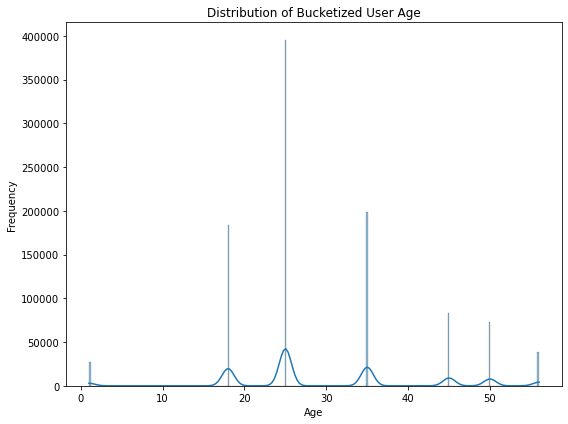

In [28]:

plt.figure(figsize=(8, 6))
sns.histplot(df_Merged['bucketized_user_age'], kde=True)
plt.title('Distribution of Bucketized User Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **2. Gender Distribution**

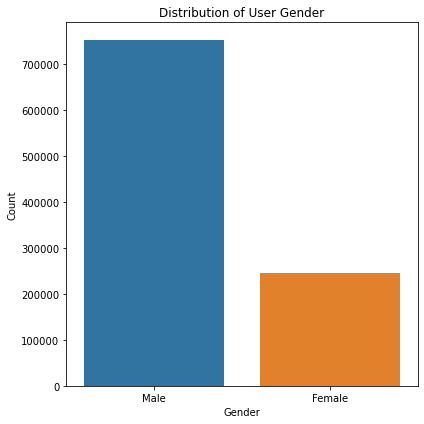

In [32]:
# Convert boolean gender to string
df_Merged['user_gender_str'] = df_Merged['user_gender'].apply(lambda x: 'Male' if x else 'Female')

# Plot the gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='user_gender_str', data=df_Merged)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### **3.Distribution of user ratings**

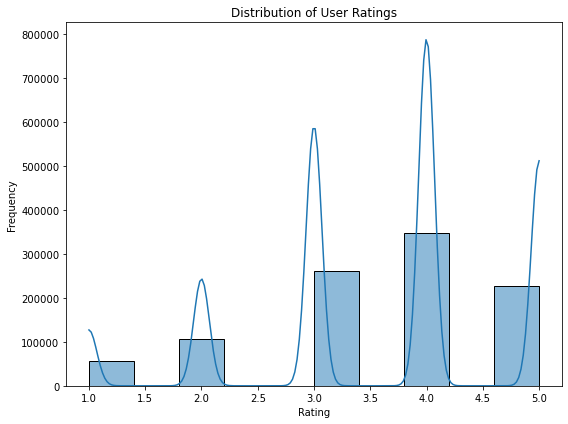

In [30]:
# Distribution of user ratings
plt.figure(figsize=(8, 6))
sns.histplot(df_Merged['user_rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **4. Rating Distributions Across User Occupations**

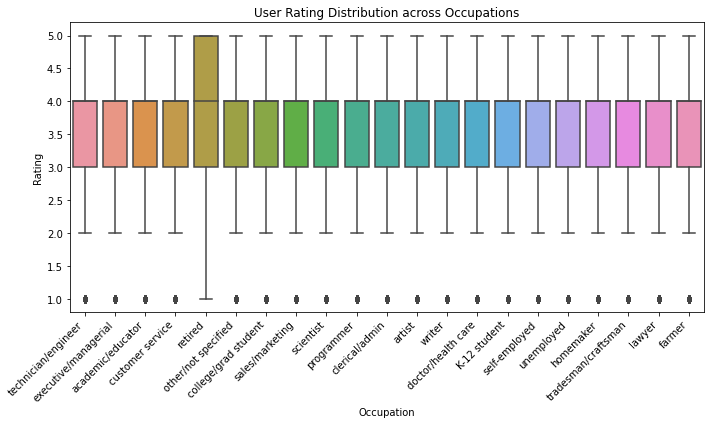

In [33]:
# Box Plot to compare rating distributions across user occupations
plt.figure(figsize=(10, 6))
sns.boxplot(x='user_occupation_text', y='user_rating', data=df_Merged)
plt.title('User Rating Distribution across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **4. DATA MODELLING**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


Accuracy of the Logistic Regression model: 0.5742


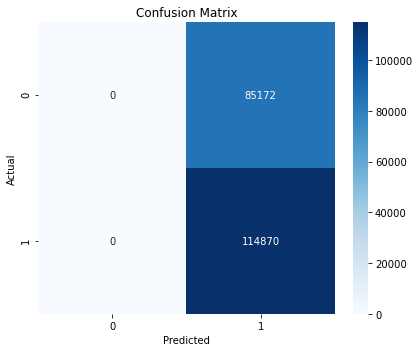

In [37]:
# Create a binary target variable: 1 if rating >= 4, else 0
df_Merged['high_rating'] = df_Merged['user_rating'].apply(lambda x: 1 if x >= 4 else 0)

# For simplicity, select a few features to predict high_rating
# In practice, selecting features is a key step
features = ['bucketized_user_age', 'user_occupation_label']
X = df_Merged[features].copy()
y = df_Merged['high_rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



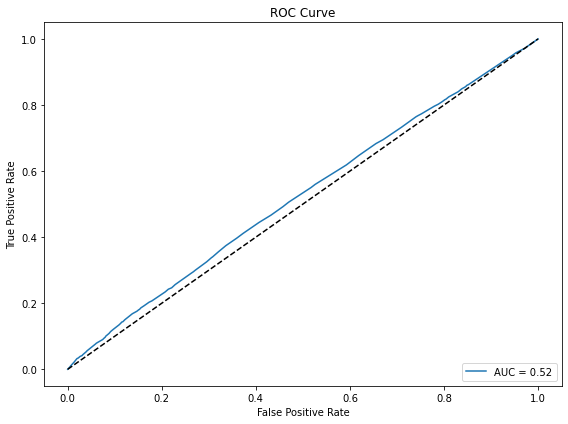

In [38]:
# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()